<a href="https://colab.research.google.com/github/massirism/Codes/blob/main/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  #Librería para procesamiento númerico
import scipy as sc #Expande la librería de NUMPY
import matplotlib.pyplot as plt #Para gráficar

from sklearn.datasets import make_circles  

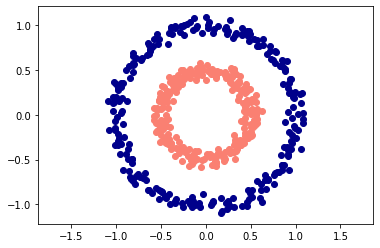

In [ ]:
#CREAR DATASETS 

n=500      #Numero de registros de los datos
p=2        #Caracteristicas sobre cada uno de los registros de los datos, ej dos caracteristicas de una persona: Altura y edad.

X,Y=make_circles(n_samples=n,factor=0.5,noise=0.05) #Factor: distancia entre los dos circulos, noise:"Ruido" en los datos 

plt.scatter( X[Y==0,0] , X[Y==0,1] ,c="darkblue") #Plotear todos los datos de la corrdenada del primer circulo Y=0
plt.scatter( X[Y==1,0] , X[Y==1,1] ,c="salmon") #Plotear todos los datos de la corrdenada del primer circulo Y=0
plt.axis("equal") #Le da la misma proporción a ambos circulos

plt.show()    #Muestra el gráfico

In [ ]:
#Clase de la capa de la red
class neural_layer():
  def __init__( self, n_conn, n_neur, act_f):
    self.act_f=act_f
    self.b=np.random.rand(1,n_neur)*  2-1
    self.w=np.random.rand(n_conn,n_neur)*  2-1

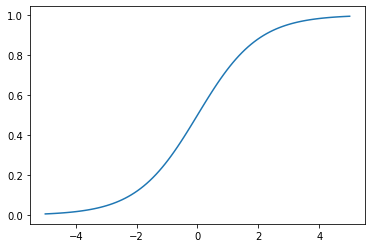

In [ ]:
#Funciones de activación
sigm= (lambda x:1/(1+np.e**(-x)), 
       lambda x:x*(1-x)
      )
relu= lambda x:np.maximum(0,x)

_x=np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

In [ ]:
#Estructura para la red neuronal
def create_nn(topology,act_f):
  nn = []
  for i,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[i],topology[i+1],act_f))
  return nn


In [ ]:
#Código para entrenar a la red neuronal
topology=[p,4,8,16,8,4,1]

RedNeuro= create_nn(topology,sigm)

l2_cost = (lambda Yp,Yr: (Yp-Yr)**2 ,
           lambda Yp,Yr: (Yp-Yr))


def train(RedNeuro, X, Y, l2_cost, lr=0.5):

  out=[(None, X)]

  #Forwar pass
  for k,layer in enumerate(RedNeuro):
    z=  out[-1][1] @RedNeuro[k].w + RedNeuro[k].b
    a= RedNeuro[k].act_f[0](z)
    out.append((z,a))

  print(l2_cost[0](out[-1][1], Y))

train(RedNeuro, X, Y, l2_cost, 0.5)
  


[[0.7755085  0.7755085  0.01424929 ... 0.7755085  0.01424929 0.7755085 ]
 [0.77551659 0.77551659 0.01424819 ... 0.77551659 0.01424819 0.77551659]
 [0.77554532 0.77554532 0.0142443  ... 0.77554532 0.0142443  0.77554532]
 ...
 [0.77548491 0.77548491 0.01425249 ... 0.77548491 0.01425249 0.77548491]
 [0.7755112  0.7755112  0.01424892 ... 0.7755112  0.01424892 0.7755112 ]
 [0.7755126  0.7755126  0.01424874 ... 0.7755126  0.01424874 0.7755126 ]]
